Importing packages

In [3]:
import numpy as np
import pandas as pd

Importing data set

In [202]:
bayes_home = pd.read_csv("G:/Practise/Bayes Homes Prices/Bayes home prices.csv")

In [22]:
bayes_home.head(3)

,Unnamed: 0,address,info,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
0,2,Address: 1160 Mission Street #2007,San FranciscoSales price: 1300000Sales date: ...,1160 Mission St UNIT 2007,2.0,2,1043,02/17/2016,1300000,37.778705,-122.412635,South of Market,4,Condominium,2007,1167508,"975,700",94103,83152781
1,5,Address: 260 King Street #475,San FranciscoSales price: 750000Sales date: 0...,260 King St UNIT 475,1.0,1,903,02/17/2016,750000,37.777641,-122.393417,South of Market,3,Condominium,2004,823719,"975,700",94107,69819817
2,7,Address: 560 Missouri Street #B,San FranciscoSales price: 1495000Sales date: ...,560 Missouri St # B,4.0,3,1425,02/17/2016,1495000,37.759198,-122.396516,Potrero Hill,6,Condominium,2003,1708594,"1,277,600",94107,64972847


In [6]:
bayes_home.shape

(11330, 19)

In [7]:
bayes_home.size

215270

In [153]:
bayes_home.describe()

,Unnamed: 0,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,totalrooms,yearbuilt,zestimate,zipcode,zpid
count,11330.000000,11330.000000,11330.000000,11330.000000,1.133000e+04,11330.000000,11330.000000,11330.000000,11330.000000,1.133000e+04,11330.000000,1.133000e+04
mean,9171.729214,1.980229,2.614475,1585.420918,1.263928e+06,37.759711,-122.436518,6.111562,1948.498147,1.565695e+06,94116.912004,3.689973e+07
std,4921.941074,1.047358,1.299457,921.978245,1.042079e+06,0.025578,0.030743,12.125819,37.911196,1.229417e+06,9.400877,7.800741e+07
min,2.000000,0.500000,0.000000,1.000000,5.350000e+02,37.708170,-122.510726,1.000000,1860.000000,4.323850e+05,94102.000000,1.506329e+07
25%,5039.750000,1.000000,2.000000,1019.000000,7.292500e+05,37.739286,-122.455157,4.000000,1916.000000,9.052375e+05,94110.000000,1.510847e+07
50%,9198.500000,2.000000,2.000000,1362.000000,9.900000e+05,37.760513,-122.432510,5.000000,1940.000000,1.230758e+06,94115.000000,1.515697e+07
75%,13374.750000,2.000000,3.000000,1876.000000,1.450000e+06,37.781386,-122.413359,7.000000,1986.000000,1.731170e+06,94123.000000,5.970040e+07
max,17632.000000,14.000000,20.000000,27275.000000,2.388900e+07,37.806083,-122.381201,1264.000000,2016.000000,1.553325e+07,94158.000000,2.146999e+09


In [14]:
bayes_home.neighborhood.value_counts().head()

Mission            540
Bernal Heights     525
South of Market    524
South Beach        461
Pacific Heights    439
Name: neighborhood, dtype: int64

Selecting features

In [166]:
bayes_home.iloc[ : , 4:15].head()

,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt
0,2.0,2,1043,02/17/2016,1300000,37.778705,-122.412635,South of Market,4,Condominium,2007
1,1.0,1,903,02/17/2016,750000,37.777641,-122.393417,South of Market,3,Condominium,2004
2,4.0,3,1425,02/17/2016,1495000,37.759198,-122.396516,Potrero Hill,6,Condominium,2003
3,3.0,3,2231,02/17/2016,2700000,37.761886,-122.396769,Potrero Hill,10,SingleFamily,1927
4,3.0,3,1300,02/17/2016,1530000,37.740795,-122.413453,Bernal Heights,4,SingleFamily,1900


Creating a new data set with relevant features

In [203]:
df = bayes_home.iloc[ : , 4:15]
df = pd.concat([df, bayes_home['zindexvalue']], axis = 1)
df.shape

(11330, 12)

In [167]:
df.head()

,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zindexvalue
0,2.0,2,1043,02/17/2016,1300000,37.778705,-122.412635,South of Market,4,Condominium,2007,"975,700"
1,1.0,1,903,02/17/2016,750000,37.777641,-122.393417,South of Market,3,Condominium,2004,"975,700"
2,4.0,3,1425,02/17/2016,1495000,37.759198,-122.396516,Potrero Hill,6,Condominium,2003,"1,277,600"
3,3.0,3,2231,02/17/2016,2700000,37.761886,-122.396769,Potrero Hill,10,SingleFamily,1927,"1,277,600"
4,3.0,3,1300,02/17/2016,1530000,37.740795,-122.413453,Bernal Heights,4,SingleFamily,1900,"1,248,000"


In [204]:
df.zindexvalue = df.zindexvalue.str.replace(',','')

Convert the zindexvalue into a numeric column

In [205]:
df.zindexvalue = pd.to_numeric(df.zindexvalue)

In [159]:
df.zindexvalue.head()

0     975700
1     975700
2    1277600
3    1277600
4    1248000
Name: zindexvalue, dtype: int64

In [50]:
df.lastsolddate.min(), df.lastsolddate.max()

('01-02-13', '12/31/2015')

The house sold period in the dateset was between January 2013 and December 2015.

In [170]:
df.describe()

,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,totalrooms,yearbuilt,zindexvalue
count,11330.000000,11330.000000,11330.000000,1.133000e+04,11330.000000,11330.000000,11330.000000,11330.000000,1.133000e+04
mean,1.980229,2.614475,1585.420918,1.263928e+06,37.759711,-122.436518,6.111562,1948.498147,1.320205e+06
std,1.047358,1.299457,921.978245,1.042079e+06,0.025578,0.030743,12.125819,37.911196,5.848170e+05
min,0.500000,0.000000,1.000000,5.350000e+02,37.708170,-122.510726,1.000000,1860.000000,6.881000e+05
25%,1.000000,2.000000,1019.000000,7.292500e+05,37.739286,-122.455157,4.000000,1916.000000,9.829000e+05
50%,2.000000,2.000000,1362.000000,9.900000e+05,37.760513,-122.432510,5.000000,1940.000000,1.211900e+06
75%,2.000000,3.000000,1876.000000,1.450000e+06,37.781386,-122.413359,7.000000,1986.000000,1.480400e+06
max,14.000000,20.000000,27275.000000,2.388900e+07,37.806083,-122.381201,1264.000000,2016.000000,5.333500e+06


To get a feel for the type of data we are dealing with, we plot a histogram for each numeric variable.

In [59]:
#matplotlib inline
import matplotlib.pyplot as plt

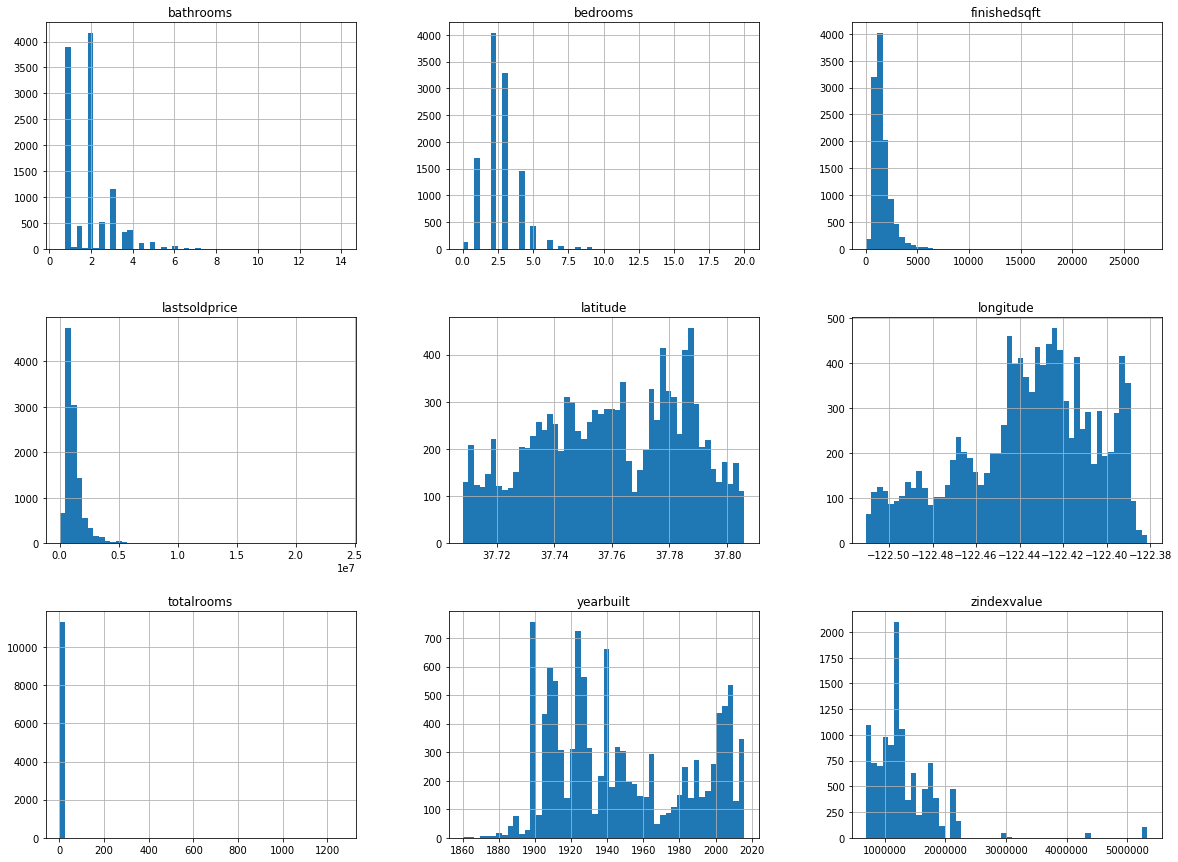

In [171]:
df.hist(bins = 50, figsize = (20,15))
plt.show()

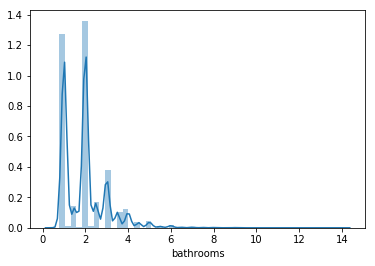

In [74]:
import seaborn as sns
sns.distplot(df.bathrooms)
plt.show()

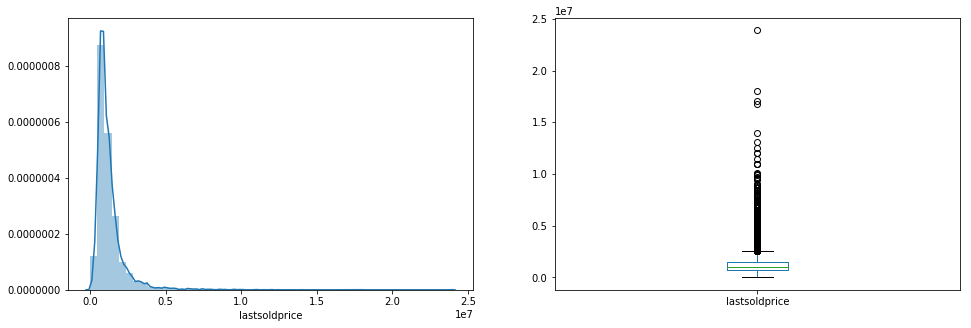

In [77]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df.lastsoldprice)
plt.subplot(122)
df.lastsoldprice.plot.box(figsize=(16,5))
plt.show()

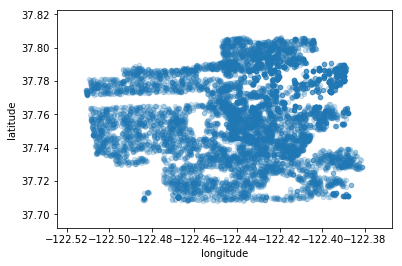

In [92]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2)
plt.show()

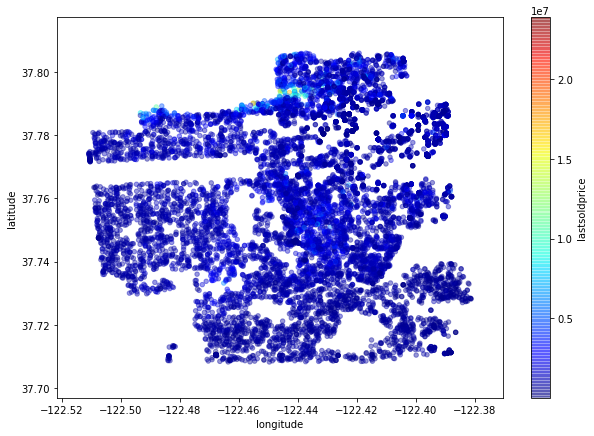

In [87]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10,7), c="lastsoldprice", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.show()

This image tells us that the most expensive houses sold were in the north area.

The variable we are going to predict is the “last sold price”. So let’s look at how much each independent variable correlates with this dependent variable.

In [172]:
corr_mat = df.corr()
corr_mat

,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,totalrooms,yearbuilt,zindexvalue
bathrooms,1.000000,0.714270,0.719096,0.536880,0.041632,-0.120276,0.135171,-0.094791,0.249193
bedrooms,0.714270,1.000000,0.697461,0.395478,-0.157859,-0.258338,0.155320,-0.312583,0.164981
finishedsqft,0.719096,0.697461,1.000000,0.647208,0.061655,-0.208110,0.156913,-0.283712,0.338131
lastsoldprice,0.536880,0.395478,0.647208,1.000000,0.283107,-0.052595,0.093527,-0.189055,0.460429
latitude,0.041632,-0.157859,0.061655,0.283107,1.000000,0.117271,-0.007126,0.140987,0.393080
longitude,-0.120276,-0.258338,-0.208110,-0.052595,0.117271,1.000000,-0.054203,0.289189,-0.188348
totalrooms,0.135171,0.155320,0.156913,0.093527,-0.007126,-0.054203,1.000000,-0.061874,0.043554
yearbuilt,-0.094791,-0.312583,-0.283712,-0.189055,0.140987,0.289189,-0.061874,1.000000,-0.219629
zindexvalue,0.249193,0.164981,0.338131,0.460429,0.393080,-0.188348,0.043554,-0.219629,1.000000


In [173]:
corr_mat['lastsoldprice'].sort_values(ascending = False)

lastsoldprice    1.000000
finishedsqft     0.647208
bathrooms        0.536880
zindexvalue      0.460429
bedrooms         0.395478
latitude         0.283107
totalrooms       0.093527
longitude       -0.052595
yearbuilt       -0.189055
Name: lastsoldprice, dtype: float64

The last sold price tends to increase when the finished sqft and the number of bathrooms go up. We can see a small negative correlation between the year built and the last sold price. And finally, coefficients close to zero indicates that there is no linear correlation.

We are now going to visualize the correlation between variables by using Pandas’ scatter_matrix function. We will just focus on a few promising variables, that seem the most correlated with the last sold price.

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


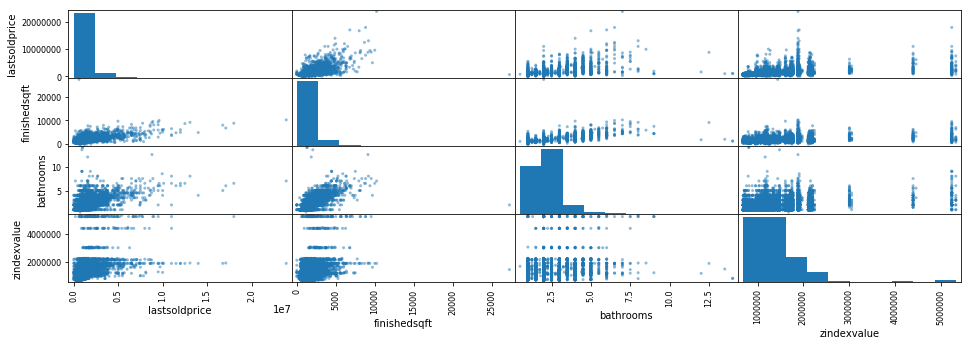

In [105]:
from pandas.tools.plotting import scatter_matrix
attributes = ['lastsoldprice', 'finishedsqft','bathrooms','zindexvalue']
scatter_matrix(df[attributes], figsize=(16,5))
plt.show()

The most promising variable for predicting the last sold price is the finished sqft, so let’s zoom in on their correlation scatter plot.

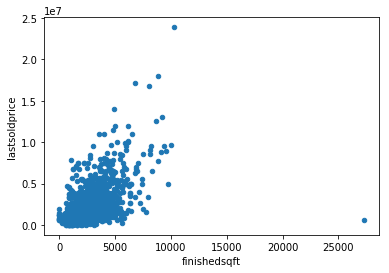

In [106]:
df.plot(kind = 'scatter', x='finishedsqft', y='lastsoldprice')
plt.show()

The correlation is indeed very strong; we can clearly see the upward trend and that the points are not too dispersed.

Because each house has different square footage and each neighborhood has different home prices, what we really need is the price per sqft. So, we add a new variable “price_per_sqft”. We then check to see how much this new independent variable correlates with the last sold price.

In [174]:
df['price_per_sqft'] = df['lastsoldprice']/df['finishedsqft']

corr_matrix = df.corr()
corr_matrix["lastsoldprice"].sort_values(ascending=False)

lastsoldprice     1.000000
finishedsqft      0.647208
bathrooms         0.536880
zindexvalue       0.460429
bedrooms          0.395478
latitude          0.283107
totalrooms        0.093527
price_per_sqft    0.005008
longitude        -0.052595
yearbuilt        -0.189055
Name: lastsoldprice, dtype: float64

Unfortunately, the new price_per_sqft variable shows only a very small positive correlation with the last sold price. But we still need this variable for grouping neighborhoods.

In [114]:
len(df.neighborhood.value_counts())

71

In [124]:
freq = df.groupby('neighborhood').count()['price_per_sqft']
freq.head()

neighborhood
Bayview             354
Bernal Heights      525
Buena Vista Park     70
Central Richmond    227
Central Sunset      229
Name: price_per_sqft, dtype: int64

In [175]:
mean_price = df.groupby('neighborhood').mean()['price_per_sqft']
mean_price.head()

neighborhood
Bayview              417.049058
Bernal Heights      3158.199830
Buena Vista Park     952.912618
Central Richmond     659.691461
Central Sunset       610.067525
Name: price_per_sqft, dtype: float64

In [132]:
cluster = pd.concat([freq, mean_price], axis = 1)
cluster.neighborhood = cluster.index
cluster.columns = ['freq', 'mean_price']
cluster.head()

,freq,mean_price
neighborhood,,
Bayview,354,417.049058
Bernal Heights,525,3158.199830
Buena Vista Park,70,952.912618
Central Richmond,227,659.691461
Central Sunset,229,610.067525


In [133]:
cluster.describe()

,freq,mean_price
count,71.000000,71.000000
mean,159.577465,1664.908308
std,126.572696,3619.277749
min,3.000000,374.201197
25%,67.500000,613.337664
50%,123.000000,756.246284
75%,210.500000,985.156646
max,540.000000,26914.471572


These are the low price neighborhoods:

In [141]:
cluster1 = cluster[cluster.mean_price < 756]
cluster1.index

Index(['Bayview', 'Central Richmond', 'Central Sunset', 'Crocker Amazon',
       'Daly City', 'Diamond Heights', 'Excelsior', 'Forest Hill',
       'Forest Hill Extension', 'Golden Gate Heights', 'Ingleside',
       'Ingleside Heights', 'Ingleside Terrace', 'Inner Parkside',
       'Inner Richmond', 'Inner Sunset', 'Lakeshore', 'Little Hollywood',
       'Merced Heights', 'Mission Terrace', 'Mount Davidson Manor',
       'Oceanview', 'Outer Mission', 'Outer Parkside', 'Outer Richmond',
       'Outer Sunset', 'Parkside', 'Portola', 'Silver Terrace', 'Sunnyside',
       'Visitacion Valley', 'West Portal', 'Western Addition',
       'Westwood Highlands', 'Westwood Park'],
      dtype='object', name='neighborhood')

These are the high price and low frequency neighborhoods:

In [139]:
cluster_temp = cluster[cluster.mean_price >= 756]
cluster2 = cluster_temp[cluster_temp.freq <123]
cluster2.index

Index(['Buena Vista Park', 'Central Waterfront - Dogpatch', 'Corona Heights',
       'Haight-Ashbury', 'Lakeside', 'Lone Mountain', 'Midtown Terrace',
       'North Beach', 'North Waterfront', 'Parnassus - Ashbury',
       'Presidio Heights', 'Sea Cliff', 'St. Francis Wood', 'Telegraph Hill',
       'Twin Peaks'],
      dtype='object', name='neighborhood')

These are the high price and high frequency neighborhoods:

In [140]:
cluster3 = cluster_temp[cluster_temp.freq >=123]
cluster3.index

Index(['Bernal Heights', 'Cow Hollow', 'Downtown',
       'Eureka Valley - Dolores Heights - Castro', 'Glen Park', 'Hayes Valley',
       'Lake', 'Lower Pacific Heights', 'Marina', 'Miraloma Park', 'Mission',
       'Nob Hill', 'Noe Valley', 'North Panhandle', 'Pacific Heights',
       'Potrero Hill', 'Russian Hill', 'South Beach', 'South of Market',
       'Van Ness - Civic Center', 'Yerba Buena'],
      dtype='object', name='neighborhood')

We add a group column based on the clusters:

In [206]:
def get_group(x):
    if x in cluster1.index:
        return 'low_price'
    elif x in cluster2.index:
        return 'high_price_low_freq'
    else:
        return 'high_price_high_freq'
df['group'] = df.neighborhood.apply(get_group)

After performing the above pre-processing, we do not need the following columns anymore: “address, lastsolddate, latitude, longitude, neighborhood, price_per_sqft”, so we drop them from our analysis.

In [207]:
df.columns

Index(['bathrooms', 'bedrooms', 'finishedsqft', 'lastsolddate',
       'lastsoldprice', 'latitude', 'longitude', 'neighborhood', 'totalrooms',
       'usecode', 'yearbuilt', 'zindexvalue', 'group'],
      dtype='object')

In [208]:
df.drop(df.columns[[3, 5, 6, 7]], axis=1, inplace=True)

Gives this table:

In [209]:
df1 = df
df = df[['bathrooms', 'bedrooms', 'finishedsqft', 'totalrooms', 'usecode', 'yearbuilt', 'zindexvalue', 'group', 'lastsoldprice']]
df.head()

,bathrooms,bedrooms,finishedsqft,totalrooms,usecode,yearbuilt,zindexvalue,group,lastsoldprice
0,2.0,2,1043,4,Condominium,2007,975700,high_price_high_freq,1300000
1,1.0,1,903,3,Condominium,2004,975700,high_price_high_freq,750000
2,4.0,3,1425,6,Condominium,2003,1277600,high_price_high_freq,1495000
3,3.0,3,2231,10,SingleFamily,1927,1277600,high_price_high_freq,2700000
4,3.0,3,1300,4,SingleFamily,1900,1248000,high_price_high_freq,1530000


Our data looks perfect!

But before we build the model, we need to create dummy variables for these two categorical variables: “usecode” and “group”.

In [210]:
X = df[['bathrooms', 'bedrooms', 'finishedsqft', 'totalrooms', 'usecode', 'yearbuilt', 'zindexvalue', 'group']]
Y = df['lastsoldprice']

In [212]:
n = pd.get_dummies(df.group)
m = pd.get_dummies(df.usecode)
X = pd.concat([X, m, n], axis=1)
drops = ['group', 'usecode']
X.drop(drops, inplace=True, axis=1)
X.head()

,bathrooms,bedrooms,finishedsqft,totalrooms,yearbuilt,zindexvalue,Apartment,Condominium,Cooperative,Duplex,Miscellaneous,Mobile,MultiFamily2To4,MultiFamily5Plus,SingleFamily,Townhouse,high_price_high_freq,high_price_low_freq,low_price
0,2.0,2,1043,4,2007,975700,0,1,0,0,0,0,0,0,0,0,1,0,0
1,1.0,1,903,3,2004,975700,0,1,0,0,0,0,0,0,0,0,1,0,0
2,4.0,3,1425,6,2003,1277600,0,1,0,0,0,0,0,0,0,0,1,0,0
3,3.0,3,2231,10,1927,1277600,0,0,0,0,0,0,0,0,1,0,1,0,0
4,3.0,3,1300,4,1900,1248000,0,0,0,0,0,0,0,0,1,0,1,0,0


# Train and Build a Linear Regression Model

In [213]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Done! We now have a working Linear Regression model.

Calculate R squared:

In [214]:
y_pred = regressor.predict(X_test)
print('Liner Regression R squared: %.4f' % regressor.score(X_test, y_test))

Liner Regression R squared: 0.5619


So, in our model, 56.19% of the variability in Y can be explained using X. This is not that exciting.

Calculate root-mean-square error (RMSE):

In [215]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Liner Regression RMSE: %.4f' % lin_rmse)

Liner Regression RMSE: 616071.5748


Our model was able to predict the value of every house in the test set within $616071 of the real price.

Calculate mean absolute error (MAE):

In [216]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_pred, y_test)
print('Liner Regression MAE: %.4f' % lin_mae)

Liner Regression MAE: 363742.1631


## Random Forest

In [217]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [218]:
print('Random Forest R squared": %.4f' % forest_reg.score(X_test, y_test))

Random Forest R squared": 0.6606


In [219]:
y_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)

Random Forest RMSE: 542303.0373


Much better! Let’s try one more.

## Gradient boosting

In [220]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [221]:
print('Gradient Boosting R squared": %.4f' % model.score(X_test, y_test))

Gradient Boosting R squared": 0.6625


In [222]:
y_pred = model.predict(X_test)
model_mse = mean_squared_error(y_pred, y_test)
model_rmse = np.sqrt(model_mse)
print('Gradient Boosting RMSE: %.4f' % model_rmse)

Gradient Boosting RMSE: 540729.9001


These are the best results we got so far, so, I would consider this is our final model.

##### Feature Importance

We have used 19 features (variables) in our model. Let’s find out which features are important and vice versa.

In [224]:
feature_labels = np.array(['bathrooms', 'bedrooms', 'finishedsqft', 'totalrooms', 'yearbuilt', 'zindexvalue', 
                           'high_price_high_freq', 'high_price_low_freq', 'low_price', 'Apartment', 'Condominium', 'Cooperative', 
                          'Duplex', 'Miscellaneous', 'Mobile', 'MultiFamily2To4', 'MultiFamily5Plus', 'SingleFamily', 
                           'Townhouse'])
importance = model.feature_importances_
importance

array([ 0.14608882,  0.03322394,  0.33259062,  0.08862914,  0.09074584,
        0.15968625,  0.        ,  0.00539891,  0.        ,  0.01212977,
        0.        ,  0.        ,  0.01675473,  0.        ,  0.04119539,
        0.        ,  0.03152242,  0.0069388 ,  0.03509537])

In [225]:
feature_indexes_by_importance = importance.argsort()
feature_indexes_by_importance

array([15, 13,  6,  8, 10, 11,  7, 17,  9, 12, 16,  1, 18, 14,  3,  4,  0,
        5,  2], dtype=int64)

In [230]:
for index in feature_indexes_by_importance:
    print('{} - {:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

MultiFamily2To4 - 0.00%
Miscellaneous - 0.00%
high_price_high_freq - 0.00%
low_price - 0.00%
Condominium - 0.00%
Cooperative - 0.00%
high_price_low_freq - 0.54%
SingleFamily - 0.69%
Apartment - 1.21%
Duplex - 1.68%
MultiFamily5Plus - 3.15%
bedrooms - 3.32%
Townhouse - 3.51%
Mobile - 4.12%
totalrooms - 8.86%
yearbuilt - 9.07%
bathrooms - 14.61%
zindexvalue - 15.97%
finishedsqft - 33.26%


The most important features are finished sqft, zindex value, number of bathrooms, total rooms, year built and so on. And the least important feature is Apartment, which means that regardless of whether this unit is an apartment or not, does not matter to the sold price. Overall, most of these 19 features are used.